In [1]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

### Importando data set

In [2]:
# importando dados
dados = pd.read_csv('credit_risk_dataset.csv')

In [3]:
dados.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


### Renomeando as colunas

In [4]:
# Renomeando as colunas para facilitar o entendimento. 
rename_colunas = {'person_age': 'idade',
           'person_income': 'renda_anual',
           'person_home_ownership': 'tipo_imovel',
           'person_emp_length': 'tempo_de_trabalho_anos',
           'loan_intent': 'objetivo_do_emprestimo',
           'loan_grade': 'grau_do_emprestimo',
           'loan_amnt': 'valor_do_emprestimo',
           'loan_int_rate': 'taxa_de_juros', 
           'loan_status': 'inadimplente', # 0 não devedor, 1 devedor
           'loan_percent_income': 'compromentimento_renda',
           'cb_person_default_on_file': 'padrao_historico', 
           'cb_person_cred_hist_length': 'prazo_emprestimo'}

In [5]:
dados = dados.rename(columns=rename_colunas)
dados

,idade,renda_anual,tipo_imovel,tempo_de_trabalho_anos,objetivo_do_emprestimo,grau_do_emprestimo,valor_do_emprestimo,taxa_de_juros,inadimplente,compromentimento_renda,padrao_historico,prazo_emprestimo
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [6]:
# Renomeando os registro na coluna tipo_imovel.
dados['tipo_imovel'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [7]:
tipo_imovel = {
    'RENT': 'ALUGADO', 
    'OWN': 'PROPIO', 
    'MORTGAGE': 'FINANCIADO', 
    'OTHER': 'OUTROS'
}
dados.tipo_imovel = dados.tipo_imovel.map(tipo_imovel)
dados

,idade,renda_anual,tipo_imovel,tempo_de_trabalho_anos,objetivo_do_emprestimo,grau_do_emprestimo,valor_do_emprestimo,taxa_de_juros,inadimplente,compromentimento_renda,padrao_historico,prazo_emprestimo
0,22,59000,ALUGADO,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,PROPIO,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,FINANCIADO,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,ALUGADO,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,ALUGADO,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,FINANCIADO,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,FINANCIADO,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,ALUGADO,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,FINANCIADO,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [8]:
# Renomeando os registro da coluna objetivo_do_emprestimo
dados.objetivo_do_emprestimo.unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [9]:
objetivo_emprestimo = {
    'PERSONAL': 'PESSOAL', 
    'EDUCATION': 'EDUCACAO', 
    'MEDICAL': 'SAUDE', 
    'VENTURE': 'INVESTIMENTO', 
    'HOMEIMPROVEMENT': 'REFORMA',
    'DEBTCONSOLIDATION': 'DIVIDA'
}
dados.objetivo_do_emprestimo = dados.objetivo_do_emprestimo.map(objetivo_emprestimo)
dados

,idade,renda_anual,tipo_imovel,tempo_de_trabalho_anos,objetivo_do_emprestimo,grau_do_emprestimo,valor_do_emprestimo,taxa_de_juros,inadimplente,compromentimento_renda,padrao_historico,prazo_emprestimo
0,22,59000,ALUGADO,123.0,PESSOAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,PROPIO,5.0,EDUCACAO,B,1000,11.14,0,0.10,N,2
2,25,9600,FINANCIADO,1.0,SAUDE,C,5500,12.87,1,0.57,N,3
3,23,65500,ALUGADO,4.0,SAUDE,C,35000,15.23,1,0.53,N,2
4,24,54400,ALUGADO,8.0,SAUDE,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,FINANCIADO,1.0,PESSOAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,FINANCIADO,4.0,PESSOAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,ALUGADO,3.0,REFORMA,B,35000,10.99,1,0.46,N,28
32579,56,150000,FINANCIADO,5.0,PESSOAL,B,15000,11.48,0,0.10,N,26


### Analisando dados

In [10]:
#Informações base de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   idade                   32581 non-null  int64  
 1   renda_anual             32581 non-null  int64  
 2   tipo_imovel             32581 non-null  object 
 3   tempo_de_trabalho_anos  31686 non-null  float64
 4   objetivo_do_emprestimo  32581 non-null  object 
 5   grau_do_emprestimo      32581 non-null  object 
 6   valor_do_emprestimo     32581 non-null  int64  
 7   taxa_de_juros           29465 non-null  float64
 8   inadimplente            32581 non-null  int64  
 9   compromentimento_renda  32581 non-null  float64
 10  padrao_historico        32581 non-null  object 
 11  prazo_emprestimo        32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [11]:
# verificando o tamanho dos dados. 
print(f'A base de dados possui {dados.shape[0]} linhas e {dados.shape[1]} colunas')

A base de dados possui 32581 linhas e 12 colunas


In [12]:
dados.describe()

,idade,renda_anual,tempo_de_trabalho_anos,valor_do_emprestimo,taxa_de_juros,inadimplente,compromentimento_renda,prazo_emprestimo
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


### Indentificando e removendo o outliers

Text(0.5, 0, 'Anos')

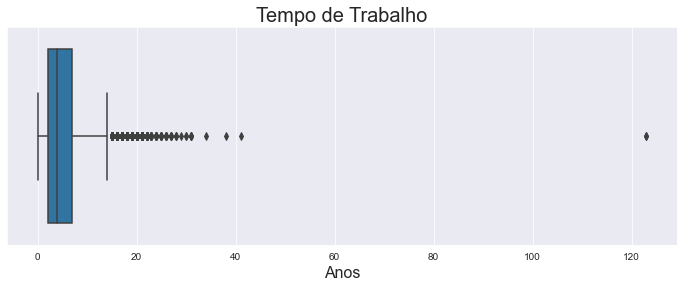

In [13]:
# indetificando e removendo outliers
sns.set_style("darkgrid")
plot = sns.boxplot(x='tempo_de_trabalho_anos', data=dados)
plot.figure.set_size_inches(12, 4)
plot.set_title('Tempo de Trabalho', fontsize=20)
plot.set_xlabel('Anos', fontsize=16)

In [14]:
# Existe outliers na coluna tempo_de_trabalho_em_anos.
dados[dados['tempo_de_trabalho_anos'] > 120]

,idade,renda_anual,tipo_imovel,tempo_de_trabalho_anos,objetivo_do_emprestimo,grau_do_emprestimo,valor_do_emprestimo,taxa_de_juros,inadimplente,compromentimento_renda,padrao_historico,prazo_emprestimo
0,22,59000,ALUGADO,123.0,PESSOAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,FINANCIADO,123.0,INVESTIMENTO,A,20000,6.54,0,0.10,N,4


In [15]:
dados_new = dados.drop(dados[dados['tempo_de_trabalho_anos'] > 120].index)
dados_new[dados_new['tempo_de_trabalho_anos'] > 120]

,idade,renda_anual,tipo_imovel,tempo_de_trabalho_anos,objetivo_do_emprestimo,grau_do_emprestimo,valor_do_emprestimo,taxa_de_juros,inadimplente,compromentimento_renda,padrao_historico,prazo_emprestimo


Text(0.5, 0, 'Anos')

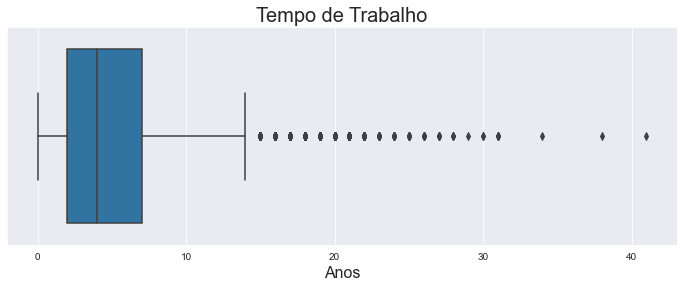

In [16]:
plot = sns.boxplot(x='tempo_de_trabalho_anos', data=dados_new)
plot.figure.set_size_inches(12, 4)
plot.set_title('Tempo de Trabalho', fontsize=20)
plot.set_xlabel('Anos', fontsize=16)

Text(0.5, 0, 'Renda')

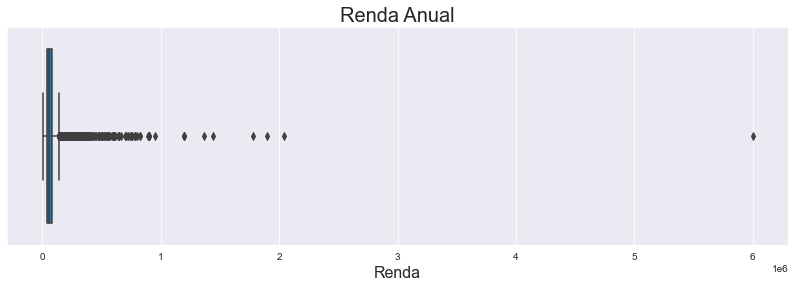

In [17]:
# Outliers da renda anual
plot = sns.boxplot(x='renda_anual', data=dados_new)
plot.figure.set_size_inches(14, 4)
plot.set_title('Renda Anual', fontsize=20)
plot.set_xlabel('Renda', fontsize=16)

In [18]:
dados_new[dados_new['renda_anual'] >= 6000000]

,idade,renda_anual,tipo_imovel,tempo_de_trabalho_anos,objetivo_do_emprestimo,grau_do_emprestimo,valor_do_emprestimo,taxa_de_juros,inadimplente,compromentimento_renda,padrao_historico,prazo_emprestimo
32297,144,6000000,FINANCIADO,12.0,PESSOAL,C,5000,12.73,0,0.0,N,25


In [19]:
dados_new.drop(dados_new[dados_new['renda_anual'] >= 6000000].index, inplace=True)
dados_new[dados_new['renda_anual'] >= 6000000]

,idade,renda_anual,tipo_imovel,tempo_de_trabalho_anos,objetivo_do_emprestimo,grau_do_emprestimo,valor_do_emprestimo,taxa_de_juros,inadimplente,compromentimento_renda,padrao_historico,prazo_emprestimo


Text(0.5, 0, 'Renda')

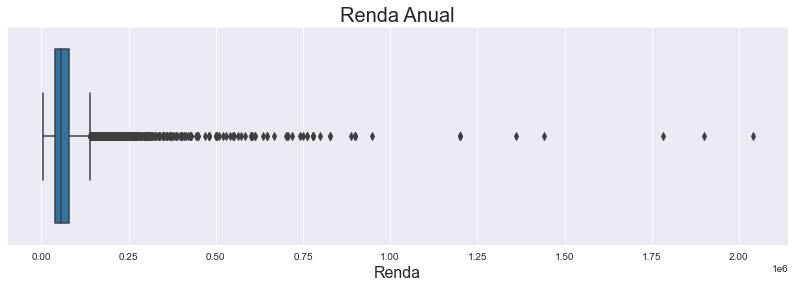

In [20]:
plot = sns.boxplot(x='renda_anual', data=dados_new)
plot.figure.set_size_inches(14, 4)
plot.set_title('Renda Anual', fontsize=20)
plot.set_xlabel('Renda', fontsize=16)

In [21]:
dados_new.head()

,idade,renda_anual,tipo_imovel,tempo_de_trabalho_anos,objetivo_do_emprestimo,grau_do_emprestimo,valor_do_emprestimo,taxa_de_juros,inadimplente,compromentimento_renda,padrao_historico,prazo_emprestimo
1,21,9600,PROPIO,5.0,EDUCACAO,B,1000,11.14,0,0.10,N,2
2,25,9600,FINANCIADO,1.0,SAUDE,C,5500,12.87,1,0.57,N,3
3,23,65500,ALUGADO,4.0,SAUDE,C,35000,15.23,1,0.53,N,2
4,24,54400,ALUGADO,8.0,SAUDE,C,35000,14.27,1,0.55,Y,4
5,21,9900,PROPIO,2.0,INVESTIMENTO,A,2500,7.14,1,0.25,N,2


Text(0.5, 0, 'Anos')

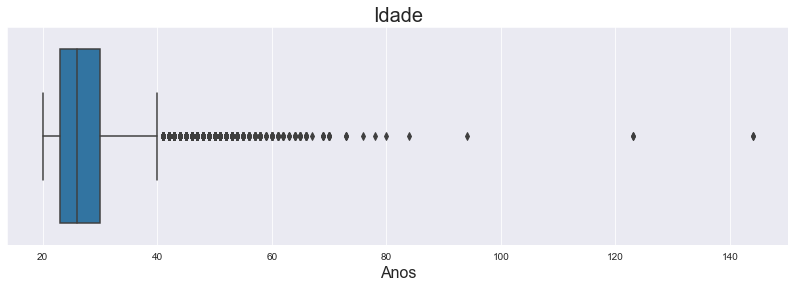

In [22]:
# Outliers da idade
plot = sns.boxplot(x='idade', data=dados_new)
plot.figure.set_size_inches(14, 4)
plot.set_title('Idade', fontsize=20)
plot.set_xlabel('Anos', fontsize=16)

In [23]:
dados_new[dados_new['idade'] > 85]

,idade,renda_anual,tipo_imovel,tempo_de_trabalho_anos,objetivo_do_emprestimo,grau_do_emprestimo,valor_do_emprestimo,taxa_de_juros,inadimplente,compromentimento_renda,padrao_historico,prazo_emprestimo
81,144,250000,ALUGADO,4.0,INVESTIMENTO,C,4800,13.57,0,0.02,N,3
183,144,200000,FINANCIADO,4.0,EDUCACAO,B,6000,11.86,0,0.03,N,2
575,123,80004,ALUGADO,2.0,EDUCACAO,B,20400,10.25,0,0.25,N,3
747,123,78000,ALUGADO,7.0,INVESTIMENTO,B,20000,NaN,0,0.26,N,4
32416,94,24000,ALUGADO,1.0,SAUDE,C,6500,NaN,0,0.27,N,27


In [24]:
# Removendo outliers (idade > 85)
dados_new.drop(dados_new[dados_new['idade'] > 85].index, inplace=True) 
dados_new.loc[dados_new['idade'] > 85]

,idade,renda_anual,tipo_imovel,tempo_de_trabalho_anos,objetivo_do_emprestimo,grau_do_emprestimo,valor_do_emprestimo,taxa_de_juros,inadimplente,compromentimento_renda,padrao_historico,prazo_emprestimo


Text(0.5, 0, 'Anos')

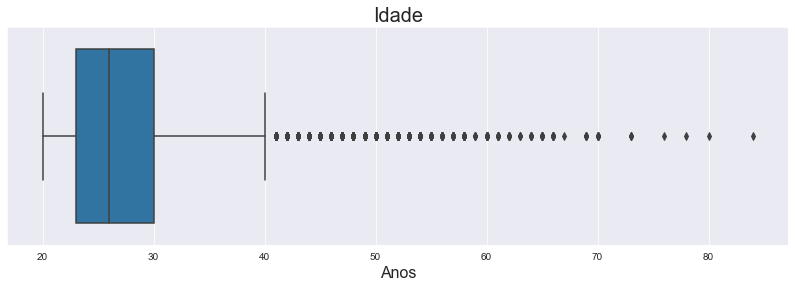

In [25]:
plot = sns.boxplot(x='idade', data=dados_new)
plot.figure.set_size_inches(14, 4)
plot.set_title('Idade', fontsize=20)
plot.set_xlabel('Anos', fontsize=16)

### Histograma dos dados

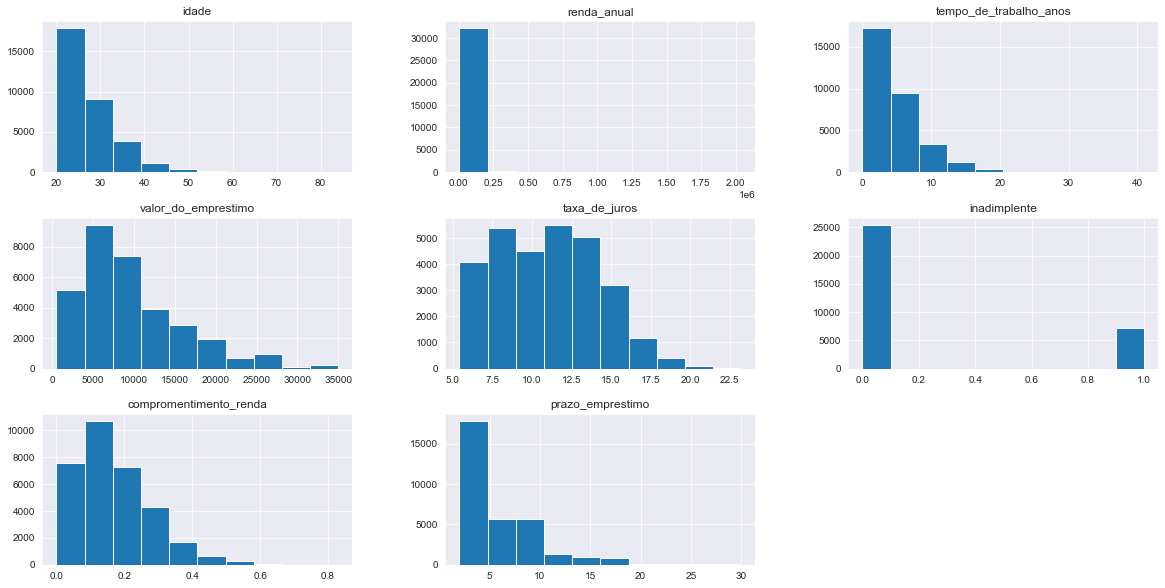

In [26]:
distribuicao_dados = dados_new.hist(figsize=(20, 10))

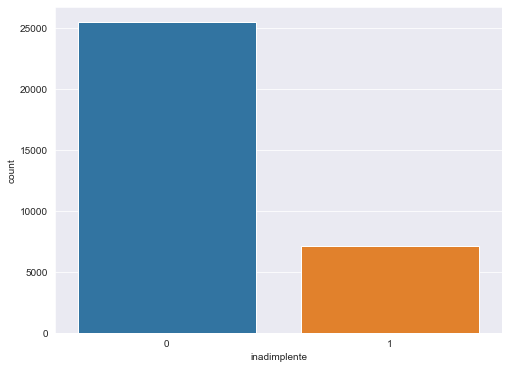

In [27]:
# Inadimplentes vs adimplentes

inadim_adim = sns.countplot(x='inadimplente', data=dados_new)
inadim_adim.figure.set_size_inches(8, 6)

### Identificando e tratando valores nulos.

In [28]:
#Identificando valores nulos.
dados_new.isnull().sum()

idade                        0
renda_anual                  0
tipo_imovel                  0
tempo_de_trabalho_anos     895
objetivo_do_emprestimo       0
grau_do_emprestimo           0
valor_do_emprestimo          0
taxa_de_juros             3114
inadimplente                 0
compromentimento_renda       0
padrao_historico             0
prazo_emprestimo             0
dtype: int64

In [29]:
# Tratando valores nulos.
media_tempo_de_trabalho_anos = dados_new['tempo_de_trabalho_anos'].mean()
media_tempo_de_trabalho_anos = float(round(media_tempo_de_trabalho_anos))
media_tempo_de_trabalho_anos

5.0

In [30]:
dados_new['tempo_de_trabalho_anos'].fillna(media_tempo_de_trabalho_anos, inplace=True)

In [31]:
dados_new.isnull().sum()

idade                        0
renda_anual                  0
tipo_imovel                  0
tempo_de_trabalho_anos       0
objetivo_do_emprestimo       0
grau_do_emprestimo           0
valor_do_emprestimo          0
taxa_de_juros             3114
inadimplente                 0
compromentimento_renda       0
padrao_historico             0
prazo_emprestimo             0
dtype: int64

In [32]:
# Valores mais frenquentes taxa de juros.
dados_new['taxa_de_juros'].value_counts()

7.51     756
10.99    749
7.49     645
7.88     642
5.42     594
        ... 
21.64      1
14.67      1
16.59      1
18.54      1
18.36      1
Name: taxa_de_juros, Length: 348, dtype: int64

In [33]:
# Média taxa de juros
media_juros = dados_new['taxa_de_juros'].mean()

In [34]:
dados_new['taxa_de_juros'].fillna(media_juros, inplace=True)

In [35]:
# removemos todos os campos nulos.
dados_new.isnull().sum()

idade                     0
renda_anual               0
tipo_imovel               0
tempo_de_trabalho_anos    0
objetivo_do_emprestimo    0
grau_do_emprestimo        0
valor_do_emprestimo       0
taxa_de_juros             0
inadimplente              0
compromentimento_renda    0
padrao_historico          0
prazo_emprestimo          0
dtype: int64

In [36]:
dados_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32573 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   idade                   32573 non-null  int64  
 1   renda_anual             32573 non-null  int64  
 2   tipo_imovel             32573 non-null  object 
 3   tempo_de_trabalho_anos  32573 non-null  float64
 4   objetivo_do_emprestimo  32573 non-null  object 
 5   grau_do_emprestimo      32573 non-null  object 
 6   valor_do_emprestimo     32573 non-null  int64  
 7   taxa_de_juros           32573 non-null  float64
 8   inadimplente            32573 non-null  int64  
 9   compromentimento_renda  32573 non-null  float64
 10  padrao_historico        32573 non-null  object 
 11  prazo_emprestimo        32573 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 4.2+ MB


### Transformando variaveis categoricas em númericas

In [37]:
# Tranformando variaveis categoricas em númericas.
categoria_new = dados_new['tipo_imovel'].unique()

In [38]:
label_enconder = preprocessing.LabelEncoder()
dados_new['tipo_imovel'] = label_enconder.fit_transform(dados_new['tipo_imovel'])

In [39]:
dados_new['tipo_imovel'].unique()

array([3, 1, 0, 2])

In [40]:
numerico_tipo_imovel = {'categoria': ['PROPIO', 'FINANCIADO', 'ALUGADO', 'OUTROS'], 'numerico': [3, 1, 0, 2]}

In [41]:
numerico_tipo_imovel = pd.DataFrame(numerico_tipo_imovel)
numerico_tipo_imovel.sort_values('numerico')

,categoria,numerico
2,ALUGADO,0
1,FINANCIADO,1
3,OUTROS,2
0,PROPIO,3


In [42]:
dados_new['objetivo_do_emprestimo'].unique()

array(['EDUCACAO', 'SAUDE', 'INVESTIMENTO', 'PESSOAL', 'REFORMA',
       'DIVIDA'], dtype=object)

In [43]:
dados_new['objetivo_do_emprestimo'] = label_enconder.fit_transform(dados_new['objetivo_do_emprestimo'])

In [44]:
dados_new['objetivo_do_emprestimo'].unique()

array([1, 5, 2, 3, 4, 0])

In [45]:
numerico_objetivo_do_emprestimo = {'categoria': ['EDUCACAO', 'SAUDE', 'INVESTIMENTO', 'PESSOAL', 'REFORMA',
       'DIVIDA'], 'numerico': [1, 5, 2, 3, 4, 0]}
numerico_objetivo_do_emprestimo = pd.DataFrame(numerico_objetivo_do_emprestimo)
numerico_objetivo_do_emprestimo.sort_values('numerico')

,categoria,numerico
5,DIVIDA,0
0,EDUCACAO,1
2,INVESTIMENTO,2
3,PESSOAL,3
4,REFORMA,4
1,SAUDE,5


### Removendo dados irrelevantes 

In [46]:
# Acredito que a coluna grau_do_emprestimo se trata do Rating do cliente.
# Algo que é avaliado após a análise de risco.
# Então vou excluir a coluna e treinar o medelo e verificar o resultado
dados_new.head()

,idade,renda_anual,tipo_imovel,tempo_de_trabalho_anos,objetivo_do_emprestimo,grau_do_emprestimo,valor_do_emprestimo,taxa_de_juros,inadimplente,compromentimento_renda,padrao_historico,prazo_emprestimo
1,21,9600,3,5.0,1,B,1000,11.14,0,0.10,N,2
2,25,9600,1,1.0,5,C,5500,12.87,1,0.57,N,3
3,23,65500,0,4.0,5,C,35000,15.23,1,0.53,N,2
4,24,54400,0,8.0,5,C,35000,14.27,1,0.55,Y,4
5,21,9900,3,2.0,2,A,2500,7.14,1,0.25,N,2


In [47]:
dados_new.drop(columns=['grau_do_emprestimo'], inplace=True)
dados_new.head()

,idade,renda_anual,tipo_imovel,tempo_de_trabalho_anos,objetivo_do_emprestimo,valor_do_emprestimo,taxa_de_juros,inadimplente,compromentimento_renda,padrao_historico,prazo_emprestimo
1,21,9600,3,5.0,1,1000,11.14,0,0.10,N,2
2,25,9600,1,1.0,5,5500,12.87,1,0.57,N,3
3,23,65500,0,4.0,5,35000,15.23,1,0.53,N,2
4,24,54400,0,8.0,5,35000,14.27,1,0.55,Y,4
5,21,9900,3,2.0,2,2500,7.14,1,0.25,N,2


In [48]:
# Não vi necessidade e não entendi o motivo da coluna padrao_historico
# Irei fazer a exclução e treinar o medelo e verificar o resultado
dados_new.drop(columns=['padrao_historico'], inplace=True)
dados_new.head()

,idade,renda_anual,tipo_imovel,tempo_de_trabalho_anos,objetivo_do_emprestimo,valor_do_emprestimo,taxa_de_juros,inadimplente,compromentimento_renda,prazo_emprestimo
1,21,9600,3,5.0,1,1000,11.14,0,0.10,2
2,25,9600,1,1.0,5,5500,12.87,1,0.57,3
3,23,65500,0,4.0,5,35000,15.23,1,0.53,2
4,24,54400,0,8.0,5,35000,14.27,1,0.55,4
5,21,9900,3,2.0,2,2500,7.14,1,0.25,2


In [49]:
# Agora que nossos dados são todos númericos
dados_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32573 entries, 1 to 32580
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   idade                   32573 non-null  int64  
 1   renda_anual             32573 non-null  int64  
 2   tipo_imovel             32573 non-null  int32  
 3   tempo_de_trabalho_anos  32573 non-null  float64
 4   objetivo_do_emprestimo  32573 non-null  int32  
 5   valor_do_emprestimo     32573 non-null  int64  
 6   taxa_de_juros           32573 non-null  float64
 7   inadimplente            32573 non-null  int64  
 8   compromentimento_renda  32573 non-null  float64
 9   prazo_emprestimo        32573 non-null  int64  
dtypes: float64(3), int32(2), int64(5)
memory usage: 3.5 MB


### Separando o X e Y.

In [50]:
# Vamos separar o Y e o X
y = dados_new['inadimplente'].values
print(y)

[0 1 1 ... 1 0 0]


In [51]:
x = dados_new.drop(columns=['inadimplente']).values
print(x)

[[2.100e+01 9.600e+03 3.000e+00 ... 1.114e+01 1.000e-01 2.000e+00]
 [2.500e+01 9.600e+03 1.000e+00 ... 1.287e+01 5.700e-01 3.000e+00]
 [2.300e+01 6.550e+04 0.000e+00 ... 1.523e+01 5.300e-01 2.000e+00]
 ...
 [6.500e+01 7.600e+04 0.000e+00 ... 1.099e+01 4.600e-01 2.800e+01]
 [5.600e+01 1.500e+05 1.000e+00 ... 1.148e+01 1.000e-01 2.600e+01]
 [6.600e+01 4.200e+04 0.000e+00 ... 9.990e+00 1.500e-01 3.000e+01]]


### Rede neural

In [52]:
# Seperando dados para treino e teste
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        test_size=0.25) # test_size=0.25 vamos usar 25% teste.                                                                     )

In [53]:
activation_entrada = 'relu'
activation_saida = 'sigmoid'
kernel_initializer = 'random_uniform'
input_dim = treino_x.shape[1]
learning_rate = 0.001
loss = 'binary_crossentropy'
metrics = ['binary_accuracy']
epochs = 100
batch_size = 10
k_folds = 5

In [54]:
def criar_rede():
    model = Sequential([
        tf.keras.layers.Dense(units=4, activation=activation_entrada, kernel_initializer=kernel_initializer, input_dim=9), 
        tf.keras.layers.Dense(units=8, activation=activation_entrada, kernel_initializer=kernel_initializer), # camada escondida.
        tf.keras.layers.Dense(units=1, activation=activation_saida) # camada de saída, vou usar função de ativação sigmoid por se tratar de um problema binario.
    ])
    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate,# taxa de aprendizagem.
                                    decay=0.001, 
                                    clipvalue=0.5)
    model.compile(optimizer=opt, 
                        loss=loss, # calculo do erro.
                        metrics=metrics)
    return model

In [55]:
model = KerasClassifier(build_fn=criar_rede,
                        epochs=epochs,
                        batch_size=batch_size)

resultados = cross_val_score(estimator=model,
                            X=treino_x,
                            y=treino_y,
                            cv=k_folds,
                            scoring='accuracy')

print(resultados)

<ipython-input-55-b4fe8aba3a14>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=criar_rede,


Epoch 1/100
1955/1955 [==============================] - 6s 3ms/step - loss: 0.5427 - binary_accuracy: 0.7765
Epoch 2/100
1955/1955 [==============================] - 5s 3ms/step - loss: 0.5054 - binary_accuracy: 0.7973
Epoch 3/100
1955/1955 [==============================] - 5s 3ms/step - loss: 0.5015 - binary_accuracy: 0.8038
Epoch 4/100
1955/1955 [==============================] - 5s 3ms/step - loss: 0.4923 - binary_accuracy: 0.8038
Epoch 5/100
1955/1955 [==============================] - 5s 2ms/step - loss: 0.4938 - binary_accuracy: 0.8111
Epoch 6/100
1955/1955 [==============================] - 7s 3ms/step - loss: 0.4863 - binary_accuracy: 0.8136
Epoch 7/100
1955/1955 [==============================] - 7s 3ms/step - loss: 0.4903 - binary_accuracy: 0.8163
Epoch 8/100
1955/1955 [==============================] - 5s 3ms/step - loss: 0.4863 - binary_accuracy: 0.8170
Epoch 9/100
1955/1955 [==============================] - 5s 3ms/step - loss: 0.4843 - binary_accuracy: 0.8140
Epoch 10/1